> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Copyright: 
Dheera Venkatraman

Explanation: Stars come in bunches.  The most famous bunch of stars on the sky is the Pleiades, a bright cluster that can be easily seen with the unaided eye.  The Pleiades lies only about 450 light years away, formed about 100 million years ago, and will likely last about another 250 million years. Our Sun was likely born in a star cluster, but now, being about 4.5 billion years old, its stellar birth companions have long since dispersed. The Pleiades star cluster is pictured over Half Dome, a famous rock structure in Yosemite National Park in California, USA. The featured image is a composite of 28 foreground exposures and 174 images of the stellar background, all taken from the same location and by the same camera on the same night in October 2019. After calculating the timing of a future juxtaposition of the Pleiades and Half Dome, the astrophotographer was unexpectedly rewarded by an electrical blackout, making the background sky unusually dark.    

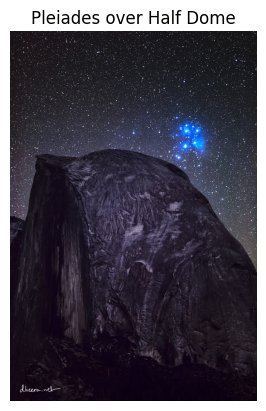

In [4]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# URL e a chave de API
url = "https://api.nasa.gov/planetary/apod"
api_key = "MBboM0CObXWiiGqszQ5edSk5WDnpsULgX2NPFa4u" 
response = requests.get(url, params={"api_key": api_key})

# status da resposta
if response.status_code == 200:
    data = response.json()
    print("Copyright:", data.get("copyright", "Informação não disponível"))
    print("Explanation:", data["explanation"])
    
    # Obter a URL da imagem
    image_url = data.get("hdurl", data.get("url"))
    if image_url:
        image_response = requests.get(image_url)
        img = Image.open(BytesIO(image_response.content))
        plt.imshow(img)
        plt.axis("off")
        plt.title(data["title"])
        plt.show()
    else:
        print("URL da imagem não encontrada.")
else:
    print(f"Erro na requisição: {response.status_code}")


#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [5]:
import requests

url = "https://api.nasa.gov/planetary/apod"
api_key = "MBboM0CObXWiiGqszQ5edSk5WDnpsULgX2NPFa4u"  
response = requests.get(url, params={"api_key": api_key})

if response.status_code == 200:
    #cabeçalhos da resposta
    headers = response.headers
    
    # Consultar os atributos X-RateLimit-Limit e X-RateLimit-Remaining
    rate_limit = headers.get("X-RateLimit-Limit", "Atributo não encontrado")
    rate_remaining = headers.get("X-RateLimit-Remaining", "Atributo não encontrado")
    

    print(f"Limite total de requisições (X-RateLimit-Limit): {rate_limit}")
    print(f"Requisições restantes (X-RateLimit-Remaining): {rate_remaining}")
else:
    print(f"Erro na requisição: {response.status_code}")


Limite total de requisições (X-RateLimit-Limit): 2000
Requisições restantes (X-RateLimit-Remaining): 1996


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [6]:
import requests

url = "https://api.nasa.gov/mars-photos/api/v1/manifests/curiosity"
api_key = "MBboM0CObXWiiGqszQ5edSk5WDnpsULgX2NPFa4u"  

response = requests.get(url, params={"api_key": api_key})

if response.status_code == 200:
    data = response.json()
    
    #'photo_manifest'
    photo_manifest = data.get("photo_manifest", {})
    
    # 'max_sol' e 'max_date'
    max_sol = photo_manifest.get("max_sol", "Não disponível")
    max_date = photo_manifest.get("max_date", "Não disponível")
    
    print(f"Máximo dia marciano de coleta (max_sol): {max_sol}")
    print(f"Última data terrestre de coleta (max_date): {max_date}")
else:
    print(f"Erro na requisição: {response.status_code}")


Máximo dia marciano de coleta (max_sol): 4434
Última data terrestre de coleta (max_date): 2025-01-25


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



In [12]:
import requests
from skimage import io
import matplotlib.pyplot as plt
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning

# Ignorar avisos de SSL
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# Requisição ignorando SSL
response = requests.get(
    "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos",
    params={"api_key": "MBboM0CObXWiiGqszQ5edSk5WDnpsULgX2NPFa4u", "sol": 1000, "page": 1},
    verify=False  # Ignora SSL
)

if response.status_code == 200:
    print(response.json())
else:
    print(f"Erro na requisição: {response.status_code}")


# Configurar a URL base e a chave de API
url = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
api_key = "MBboM0CObXWiiGqszQ5edSk5WDnpsULgX2NPFa4u"  # Substitua por sua chave
max_sol = 1000  # Substitua pelo max_sol retornado no exercício anterior
cameras_of_interest = {"NAVCAM", "FHAZ", "RHAZ"}  # Câmeras interessantes
page = 1  # Página inicial

# Requisição e plotagem
while True:
    # Fazer a requisição GET
    response = requests.get(url, params={"api_key": api_key, "sol": max_sol, "page": page})
    
    # Verificar o status da resposta
    if response.status_code != 200:
        print(f"Erro na requisição: {response.status_code}")
        break
    
    data = response.json()
    photos = data.get("photos", [])
    
    # Encerrar o laço se não houver mais fotos
    if not photos:
        print("Fim dos dados.")
        break
    
    # Processar e exibir as imagens das câmeras de interesse
    for photo in photos:
        camera_name = photo["camera"]["name"]
        if camera_name in cameras_of_interest:
            img_url = photo["img_src"]
            img_id = photo["id"]
            
            # Carregar e exibir a imagem
            img = io.imread(img_url)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Página {page} | Câmera: {camera_name} | ID: {img_id}")
            plt.show()
    
    # Avançar para a próxima página
    page += 1


{'photos': [{'id': 102693, 'sol': 1000, 'camera': {'id': 20, 'name': 'FHAZ', 'rover_id': 5, 'full_name': 'Front Hazard Avoidance Camera'}, 'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG', 'earth_date': '2015-05-30', 'rover': {'id': 5, 'name': 'Curiosity', 'landing_date': '2012-08-06', 'launch_date': '2011-11-26', 'status': 'active'}}, {'id': 102694, 'sol': 1000, 'camera': {'id': 20, 'name': 'FHAZ', 'rover_id': 5, 'full_name': 'Front Hazard Avoidance Camera'}, 'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FRB_486265257EDR_F0481570FHAZ00323M_.JPG', 'earth_date': '2015-05-30', 'rover': {'id': 5, 'name': 'Curiosity', 'landing_date': '2012-08-06', 'launch_date': '2011-11-26', 'status': 'active'}}, {'id': 102850, 'sol': 1000, 'camera': {'id': 21, 'name': 'RHAZ', 'rover_id': 5, 'full_name': 'Rear Hazard Avoidance Camera'}, 'img_src': 'http

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1020)>